In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ELEC_FILE_PATH = "C:/Users/valdi/Documents/GitHubProjects/energy/data/electricity_prices.csv"
WEATHER_FILE_PATH = "C:/Users/valdi/Documents/GitHubProjects/energy/data/forecast_weather.csv"

In [3]:
electricity_data = pd.read_csv(ELEC_FILE_PATH)
weather_data = pd.read_csv(WEATHER_FILE_PATH)

In [8]:
electricity_data

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [44]:
weather_data[weather_data['data_block_id'] == 40]

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
209664,57.6,21.7,2021-10-10 02:00:00,1,11.421777,8.825098,0.967773,0.000092,0.939032,0.981766,4.883173,4.242588,40,2021-10-10 03:00:00,0.0,0.0,0.0,0.000000
209665,57.6,22.2,2021-10-10 02:00:00,1,8.968896,6.780664,0.601608,0.039185,0.936148,0.957382,1.523066,3.278721,40,2021-10-10 03:00:00,0.0,0.0,0.0,0.000000
209666,57.6,22.7,2021-10-10 02:00:00,1,9.172998,6.836572,0.411255,0.000458,0.903495,0.935089,2.625727,3.853306,40,2021-10-10 03:00:00,0.0,0.0,0.0,0.000000
209667,57.6,23.2,2021-10-10 02:00:00,1,9.631982,7.295313,0.022598,0.000000,0.964286,0.964966,4.055170,4.935459,40,2021-10-10 03:00:00,0.0,0.0,0.0,0.000000
209668,57.6,23.7,2021-10-10 02:00:00,1,9.978662,7.667383,0.018555,0.000000,0.737281,0.740112,4.486445,5.013950,40,2021-10-10 03:00:00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215035,59.7,26.2,2021-10-10 02:00:00,48,8.042017,2.915186,0.000183,0.326294,0.124335,0.348478,-0.076234,6.548487,40,2021-10-12 02:00:00,0.0,0.0,0.0,0.000000
215036,59.7,26.7,2021-10-10 02:00:00,48,7.855249,2.934717,0.000000,0.689362,0.744162,0.833525,-0.686830,7.455957,40,2021-10-12 02:00:00,0.0,0.0,0.0,0.000103
215037,59.7,27.2,2021-10-10 02:00:00,48,8.111475,3.161279,0.000000,0.028564,0.995322,0.995344,0.482604,8.250635,40,2021-10-12 02:00:00,0.0,0.0,0.0,0.000011
215038,59.7,27.7,2021-10-10 02:00:00,48,8.272119,3.752588,0.000000,0.000000,0.996268,0.996260,0.427428,8.665674,40,2021-10-12 02:00:00,0.0,0.0,0.0,0.000000


In [16]:
weather_data.columns

Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')

In [17]:
weather_aggregated = weather_data.groupby('origin_datetime').agg({
    'temperature': ['mean', 'max', 'min'],
    'dewpoint': ['mean', 'max', 'min'],
    'cloudcover_high': ['mean', 'max', 'min'],
    'cloudcover_low': ['mean', 'max', 'min'],
    'cloudcover_mid': ['mean', 'max', 'min'],
    'cloudcover_total': ['mean', 'max', 'min'],
    '10_metre_u_wind_component': ['mean', 'max', 'min'],
    '10_metre_v_wind_component': ['mean', 'max', 'min'],
    'direct_solar_radiation': ['mean', 'max', 'min'],
    'surface_solar_radiation_downwards': ['mean', 'max', 'min'],
    'snowfall': ['mean', 'max', 'min'],
    'total_precipitation': ['mean', 'max', 'min'],
}).reset_index()

weather_aggregated.columns = ['_'.join(col) if col[1] else col[0] for col in weather_aggregated.columns]

weather_aggregated

,origin_datetime,temperature_mean,temperature_max,temperature_min,dewpoint_mean,dewpoint_max,dewpoint_min,cloudcover_high_mean,cloudcover_high_max,cloudcover_high_min,...,direct_solar_radiation_min,surface_solar_radiation_downwards_mean,surface_solar_radiation_downwards_max,surface_solar_radiation_downwards_min,snowfall_mean,snowfall_max,snowfall_min,total_precipitation_mean,total_precipitation_max,total_precipitation_min
0,2021-09-01 02:00:00,12.931143,17.304102,7.174951,7.567056,13.762109,2.365747,0.160454,1.000000,0.0,...,-0.102222,163.301157,615.488611,-0.153333,0.0,0.0,0.0,0.000044,0.002212,-7.629395e-06
1,2021-09-02 02:00:00,12.107136,17.439111,6.117334,6.729556,13.786401,1.548364,0.133441,0.999908,0.0,...,-0.064444,151.808241,604.773333,-0.123333,0.0,0.0,0.0,0.000095,0.002177,-3.814697e-06
2,2021-09-03 02:00:00,11.006273,16.645166,3.590723,5.294735,12.955225,-0.347998,0.019343,1.000000,0.0,...,-0.068889,159.213651,594.477778,-0.123889,0.0,0.0,0.0,0.000077,0.002208,-2.145767e-06
3,2021-09-04 02:00:00,10.235295,15.048975,1.997461,4.462485,11.555322,-0.034155,0.267981,0.994431,0.0,...,0.000000,164.065079,607.435556,-0.134167,0.0,0.0,0.0,0.000054,0.003196,-3.814697e-06
4,2021-09-05 02:00:00,11.258302,16.621240,3.252588,6.642921,13.388330,0.298975,0.664691,1.000003,0.0,...,-0.087500,129.716243,598.256667,-0.150556,0.0,0.0,0.0,0.000040,0.001761,-7.092953e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,2023-05-26 02:00:00,11.461251,20.085840,3.975977,2.899960,10.824365,-6.296729,0.103232,1.000000,0.0,...,-0.568889,298.081495,837.213056,-0.008889,0.0,0.0,0.0,0.000010,0.001133,-3.337860e-06
633,2023-05-27 02:00:00,12.099286,20.864404,3.758691,3.835627,10.792871,-6.654883,0.088615,1.000000,0.0,...,-0.564444,305.245926,832.912500,0.000000,0.0,0.0,0.0,0.000004,0.000797,-3.814697e-06
634,2023-05-28 02:00:00,12.097946,21.211572,1.123682,5.110484,10.832178,-5.086523,0.248430,1.000000,0.0,...,-0.608889,296.636362,820.150278,-0.040000,0.0,0.0,0.0,0.000014,0.004864,-5.960464e-08
635,2023-05-29 02:00:00,11.405983,18.763818,4.981104,4.550760,10.702173,-5.450293,0.207919,1.000000,0.0,...,-0.568889,287.534312,824.831111,0.000000,0.0,0.0,0.0,0.000029,0.002431,-7.629395e-06


In [19]:
energy_df_small = electricity_data[['euros_per_mwh','origin_date']]
energy_df_small

,euros_per_mwh,origin_date
0,92.51,2021-08-31 00:00:00
1,88.90,2021-08-31 01:00:00
2,87.35,2021-08-31 02:00:00
3,86.88,2021-08-31 03:00:00
4,88.43,2021-08-31 04:00:00
...,...,...
15281,82.10,2023-05-29 19:00:00
15282,150.85,2023-05-29 20:00:00
15283,82.10,2023-05-29 21:00:00
15284,82.09,2023-05-29 22:00:00


In [23]:
full_df = pd.merge(
    energy_df_small, 
    weather_aggregated, 
    left_on='origin_date', 
    right_on='origin_datetime', 
    how='inner'
)

full_df.drop(columns=['origin_datetime'], inplace=True)
full_df

,euros_per_mwh,origin_date,temperature_mean,temperature_max,temperature_min,dewpoint_mean,dewpoint_max,dewpoint_min,cloudcover_high_mean,cloudcover_high_max,...,direct_solar_radiation_min,surface_solar_radiation_downwards_mean,surface_solar_radiation_downwards_max,surface_solar_radiation_downwards_min,snowfall_mean,snowfall_max,snowfall_min,total_precipitation_mean,total_precipitation_max,total_precipitation_min
0,93.88,2021-09-01 02:00:00,12.931143,17.304102,7.174951,7.567056,13.762109,2.365747,0.160454,1.000000,...,-0.102222,163.301157,615.488611,-0.153333,0.0,0.0,0.0,0.000044,0.002212,-7.629395e-06
1,86.11,2021-09-02 02:00:00,12.107136,17.439111,6.117334,6.729556,13.786401,1.548364,0.133441,0.999908,...,-0.064444,151.808241,604.773333,-0.123333,0.0,0.0,0.0,0.000095,0.002177,-3.814697e-06
2,97.37,2021-09-03 02:00:00,11.006273,16.645166,3.590723,5.294735,12.955225,-0.347998,0.019343,1.000000,...,-0.068889,159.213651,594.477778,-0.123889,0.0,0.0,0.0,0.000077,0.002208,-2.145767e-06
3,90.86,2021-09-04 02:00:00,10.235295,15.048975,1.997461,4.462485,11.555322,-0.034155,0.267981,0.994431,...,0.000000,164.065079,607.435556,-0.134167,0.0,0.0,0.0,0.000054,0.003196,-3.814697e-06
4,90.78,2021-09-05 02:00:00,11.258302,16.621240,3.252588,6.642921,13.388330,0.298975,0.664691,1.000003,...,-0.087500,129.716243,598.256667,-0.150556,0.0,0.0,0.0,0.000040,0.001761,-7.092953e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,60.46,2023-05-25 02:00:00,13.253986,23.574365,5.533594,6.269962,14.105249,-3.281348,0.274923,1.000000,...,-0.608889,250.983069,824.177778,-0.019722,0.0,0.0,0.0,0.000015,0.001215,-3.814697e-06
632,82.70,2023-05-26 02:00:00,11.461251,20.085840,3.975977,2.899960,10.824365,-6.296729,0.103232,1.000000,...,-0.568889,298.081495,837.213056,-0.008889,0.0,0.0,0.0,0.000010,0.001133,-3.337860e-06
633,79.96,2023-05-27 02:00:00,12.099286,20.864404,3.758691,3.835627,10.792871,-6.654883,0.088615,1.000000,...,-0.564444,305.245926,832.912500,0.000000,0.0,0.0,0.0,0.000004,0.000797,-3.814697e-06
634,4.07,2023-05-28 02:00:00,12.097946,21.211572,1.123682,5.110484,10.832178,-5.086523,0.248430,1.000000,...,-0.608889,296.636362,820.150278,-0.040000,0.0,0.0,0.0,0.000014,0.004864,-5.960464e-08


In [53]:
full_df['next_day_price'] = full_df['euros_per_mwh'].shift(-1)
full_df = full_df.dropna(subset=['next_day_price'])

for lag in range(1, 24):  # Add 24 lagged price features
    full_df[f'price_lag_{lag}'] = full_df['euros_per_mwh'].shift(lag)
full_df = full_df.dropna()  # Drop rows with NaN values due to lagging

features = full_df.drop(columns=['euros_per_mwh', 'next_day_price', 'origin_date'])
target = full_df['next_day_price']

C:\Users\valdi\AppData\Local\Temp\ipykernel_17632\3244642753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df[f'price_lag_{lag}'] = full_df['euros_per_mwh'].shift(lag)


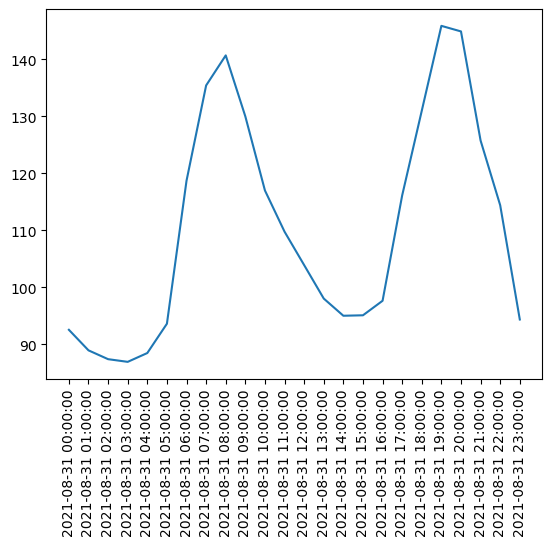

In [12]:
small_dataset = electricity_data[electricity_data['data_block_id'] == 1]

date = small_dataset['origin_date']
price = small_dataset['euros_per_mwh']

plt.plot(date, price)
plt.xticks(rotation=90)
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

In [7]:
import torch
import lightning as L
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

In [63]:
class IntraDayPriceForecastingModule(L.LightningModule):
    def __init__(self, input_dim, hidden_dim=150, output_dim=1):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)  # hidden shape: (num_layers, batch_size, hidden_dim)
        return self.fc(hidden[-1])  # Use the last layer's hidden state

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)  # No need to unsqueeze, inputs already have the correct shape
        loss = torch.nn.functional.mse_loss(outputs, targets)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.002)

In [64]:
class EnergyPriceDataset(Dataset):
    def __init__(self, features, target, sequence_length):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.features) - self.sequence_length

    def __getitem__(self, idx):
        x = self.features[idx:idx + self.sequence_length]  # Shape: (sequence_length, input_dim)
        y = self.target[idx + self.sequence_length]  # Shape: (1,)
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [65]:
# Assuming features_scaled and target_scaled are already prepared
sequence_length = 24  # Use past 24 hours of data
dataset = EnergyPriceDataset(features_scaled, target_scaled, sequence_length)

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [67]:
# Initialize the model with the correct input_dim
input_dim = features_scaled.shape[1]  # Number of features
model = IntraDayPriceForecastingModule(input_dim=input_dim)

# Train the model
trainer = L.Trainer(max_epochs=50)
trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\valdi\miniconda3\envs\energy\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.

  | Name | Type   | Params | Mode 
----------------------------------------
0 | lstm | LSTM   | 126 K  | train
1 | fc   | Linear | 151    | train
----------------------------------------
126 K     Trainable params
0         Non-trainable params
126 K     Total params
0.507     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
C:\Users\valdi\miniconda3\envs\energy\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve perform

Epoch 49: 100%|███████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 27.14it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|███████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 26.32it/s, v_num=1]


In [68]:
model.eval()
with torch.no_grad():
    test_input = torch.tensor(features_scaled[-sequence_length:], dtype=torch.float32).unsqueeze(0)
    prediction = model(test_input)
    predicted_price = scaler.inverse_transform(prediction.numpy())  # Rescale to original units
    print(f"Predicted next day price: {predicted_price[0][0]} euros_per_mwh")

Predicted next day price: 51.91582107543945 euros_per_mwh


In [69]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already trained the model and have the test data ready
# Replace `model`, `test_loader`, and `scaler` with your actual objects

def evaluate_model(model, test_loader, scaler):
    model.eval()  # Set the model to evaluation mode
    actuals = []
    predictions = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Forward pass
            actuals.extend(targets.numpy())  # Collect actual values
            predictions.extend(outputs.numpy())  # Collect predicted values

    # Inverse transform the scaled values to original units
    actuals = scaler.inverse_transform(np.array(actuals).reshape(-1))
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1))

    # Calculate evaluation metrics
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    return actuals, predictions

def plot_actual_vs_predicted(actuals, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(actuals, label="Actual Prices", color="blue")
    plt.plot(predictions, label="Predicted Prices", color="red", linestyle="--")
    plt.title("Actual vs Predicted Prices")
    plt.xlabel("Time Steps")
    plt.ylabel("Price (euros_per_mwh)")
    plt.legend()
    plt.grid()
    plt.show()

def plot_residuals(actuals, predictions):
    residuals = actuals - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.grid()
    plt.show()

# Load the test dataset and create a DataLoader
# Replace `test_features_scaled` and `test_target_scaled` with your actual test data
test_dataset = EnergyPriceDataset(test_features_scaled, test_target_scaled, sequence_length)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model
actuals, predictions = evaluate_model(model, test_loader, scaler)

# Plot the results
plot_actual_vs_predicted(actuals, predictions)
plot_residuals(actuals, predictions)

NameError: name 'test_features_scaled' is not defined